In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import math
from operator import itemgetter
from scipy import interpolate

In [2]:
def sample_Cubic_Splines_With_Derivative(points, tangents, resolution):
    resolution = float(resolution)
    points = np.asarray(points)
    nPoints, dim = points.shape

       # Параметризация параметра s.
    dp = np.diff(points, axis=0)                 # разность между точками
    dp = np.linalg.norm(dp, axis=1)              # расстояние между точками
    d = np.cumsum(dp)                            # накапливаемая сумма по сегментам
    d = np.hstack([[0],d])                       # добавляем расстояние от первой точки
    l = d[-1]                                    # длина последовательности точек
    nSamples = int(l/resolution)                 # количество выборки (сегментов)
    s,r = np.linspace(0,l,nSamples,retstep=True) # параметр и шаг

       # Приводим точки и касательную в правильный формат.
    assert(len(points) == len(tangents))
    data = np.empty([nPoints, dim], dtype=object)
    for i,p in enumerate(points):
        t = tangents[i]
           # Либо касательная None, либо имеет тот же размер
           # количество размерностей в качестве точки р.
        assert(t is None or len(t)==dim)
        fuse = list(zip(p,t) if t is not None else zip(p,))
        data[i,:] = fuse

       # Вычислить сплайны по размерности отдельно.
    samples = np.zeros([nSamples, dim])
    for i in range(dim):
        poly = interpolate.BPoly.from_derivatives(d, data[:,i])
        samples[:,i] = poly(s)
    return samples


In [3]:
#Вводим данные (входные точки, данные о касательной (направление и величина), параметр параметризации)
points = []
tangents = []
resolution = 0.1
points.append([0.,0.]); tangents.append([1,1])
points.append([3.,4.]); tangents.append([1,0])
points.append([5.,2.]); tangents.append([0,-1])
points.append([3.,0.]); tangents.append([-1,-1])
points.append([6.,-2.]); tangents.append([0,0])


points = np.asarray(points)
tangents = np.asarray(tangents)

scale = 1.
tangents1 = np.dot(tangents, scale*np.eye(2))

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


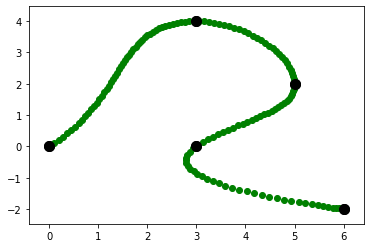

In [4]:
temp = sample_Cubic_Splines_With_Derivative(points, tangents1, resolution)
x_points = temp[:,0]
y_points = temp[:,1]


fig, ax = plt.subplots()

def init():
    plt.scatter(points[:,0], points[:,1], s=100, c='k', label='input')

def animate(i):    
    line = ax.scatter([x_points[i]],[y_points[i]], c = 'g', marker = 'o')
    return line

anim = animation.FuncAnimation(fig, animate, frames=len(x_points), init_func=init, interval=10, repeat=False)
anim.save('аппроксимация кривой.gif', writer='PillowWriter', fps=100)  